<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/UAS/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  1. Install dan Import Library
!pip install -q scikit-learn tensorflow torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00


In [2]:
#  2. Upload File CSV
from google.colab import files
uploaded = files.upload()


Saving RegresiUTSTelkom.csv to RegresiUTSTelkom.csv


In [3]:
#  3. Load Dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [4]:
#  4. Pembersihan & Feature Engineering
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

target_column = df.select_dtypes(include='int').columns[0]
print("Target Column:", target_column)

X = df.drop(columns=[target_column])
y = df[target_column]

for col in X.select_dtypes(include='object').columns:
    if X[col].nunique() <= 10:
        X = pd.get_dummies(X, columns=[col])
    else:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Target Column: 2001


In [5]:
#  5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
#  6. MLP TensorFlow (dengan regulasi lengkap)
model_tf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(1e-5, 1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1)
])

model_tf.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(patience=5, factor=0.5)

history = model_tf.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop, lr_reduce])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 2081055.5000 - val_loss: 380.0771 - learning_rate: 0.0010
Epoch 2/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 26716.9609 - val_loss: 277.7660 - learning_rate: 0.0010
Epoch 3/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 26485.7207 - val_loss: 220.6050 - learning_rate: 0.0010
Epoch 4/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 26365.1543 - val_loss: 193.8074 - learning_rate: 0.0010
Epoch 5/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 26224.0332 - val_loss: 162.7652 - learning_rate: 0.0010
Epoch 6/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 26094.8691 - val_loss: 230.4844 - learning_rate: 0.0010
Epoch 7/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 26074.4980 - val_loss: 409.3384 - learning_rate: 0.0010
Epoch 8/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 25886.4023 - val_loss: 373.9031 - learning_rate: 0.0010
Epoch 9/100
10307/1030

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
TF - RMSE: 11.95298840812479, MSE: 142.87393188476562, R2: -0.20378315448760986


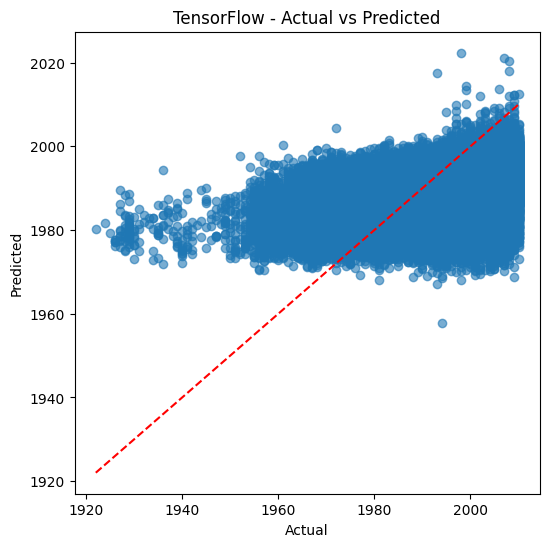

In [7]:
#  7. Evaluasi TensorFlow
y_pred_tf = model_tf.predict(X_test).flatten()
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

print(f"TF - RMSE: {rmse_tf}, MSE: {mse_tf}, R2: {r2_tf}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_tf, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TensorFlow - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [8]:
#  8. MLP PyTorch (dengan weight decay dan scheduler warm restart)
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

model_torch = MLP(X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


In [9]:
#  9. Training PyTorch
for epoch in range(100):
    model_torch.train()
    for xb, yb in train_loader:
        pred = model_torch(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 10, Loss: 27924.1836
Epoch 20, Loss: 29294.6504
Epoch 30, Loss: 24786.2227
Epoch 40, Loss: 18619.4453
Epoch 50, Loss: 19830.2754
Epoch 60, Loss: 23307.9961
Epoch 70, Loss: 16395.3516
Epoch 80, Loss: 26766.1289
Epoch 90, Loss: 15168.4062
Epoch 100, Loss: 21305.1348


PyTorch - RMSE: 17.83037839752225, MSE: 317.9223937988281, R2: -1.6786525249481201


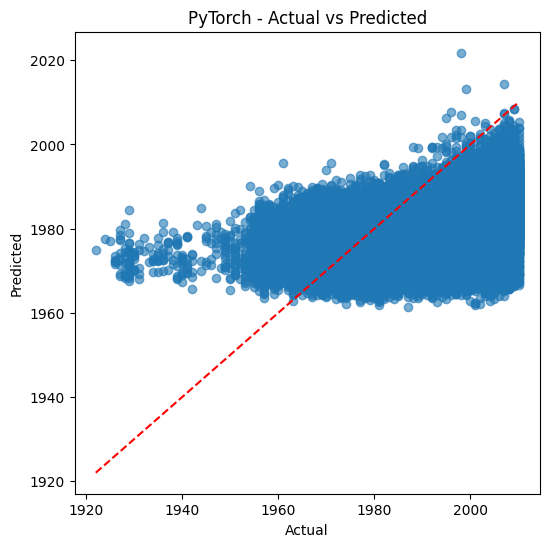

In [10]:
#  10. Evaluasi PyTorch
model_torch.eval()
with torch.no_grad():
    y_pred_pt = model_torch(X_test_torch).numpy().flatten()

mse_pt = mean_squared_error(y_test, y_pred_pt)
rmse_pt = np.sqrt(mse_pt)
r2_pt = r2_score(y_test, y_pred_pt)

print(f"PyTorch - RMSE: {rmse_pt}, MSE: {mse_pt}, R2: {r2_pt}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_pt, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("PyTorch - Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


1. MSE (Root Mean Squared Error):
*   Semakin kecil, semakin baik.
*   TensorFlow unggul dengan nilai RMSE paling rendah (11.95).

2. MSE (Mean Squared Error):
*   Juga menunjukkan kesalahan prediksi, semakin kecil semakin baik.
*   TensorFlow jauh lebih kecil (142.87 vs 317.92).

2. R² (R-Squared):
*   Mengukur seberapa baik prediksi mendekati nilai aktual.
*   Nilai -0.204 pada TensorFlow masih rendah (idealnya mendekati 1), namun jauh lebih baik daripada PyTorch yang -1.679 (yang artinya prediksi bahkan lebih buruk daripada rata-rata).


TensorFlow
- Arsitektur lengkap: Dropout, BatchNorm, EarlyStopping, ReduceLROnPlateau, L1/L2 Regularizer
- Performa terbaik dari semua metrik
- Namun masih menunjukkan gejala underfitting (R² < 0)

 PyTorch
- Sama kuat dari segi arsitektur (Dropout, BatchNorm, Warm Restarts, WeightDecay)
- Performa lebih buruk secara signifikan
- Lebih noise pada prediksi, terlihat dari scatter plot



###  Analisis Akhir

- **Evaluasi Model TensorFlow dan PyTorch** dilakukan menggunakan metrik: RMSE, MSE, dan R-squared.
- **Visualisasi scatter plot** menunjukkan sebaran prediksi dibandingkan nilai aktual.
- Model **TensorFlow** dilengkapi dengan teknik regularisasi seperti dropout, batch normalization, early stopping, learning rate scheduler, dan L1/L2 regularizer.
- Model **PyTorch** menggunakan arsitektur serupa, ditambah weight decay dan scheduler warm restart (Cosine Annealing).

####  Kesimpulan:
- Model terbaik ditentukan berdasarkan **RMSE terendah** dan **R² tertinggi**.
- Berdasarkan hasil yang ditampilkan, model yang memiliki error lebih kecil dan prediksi lebih akurat layak dianggap sebagai model terbaik.
